In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd. read_csv ("online_shoppers_intention.csv") # набор данных с сайта kaggle
print("Размерность данных:" , data.shape)

Размерность данных: (12330, 18)


In [7]:
data.head() # просмотр данных

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [9]:
# Описание признаков набора даныых
print("\nСтолбцы:" , data.columns.tolist())


Столбцы: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']


In [11]:
# Информация о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [12]:
# Пропущенные значения
print("Пропущенные значения:")
missing_data = data.isnull().sum()
missing_percent = (missing_data / len(data))*100
pd.DataFrame({'Количество пропусков': missing_data, 'Процент пропусков': missing_percent.round(2)})


Пропущенные значения:


,Количество пропусков,Процент пропусков
Administrative,0,0.0
Administrative_Duration,0,0.0
Informational,0,0.0
Informational_Duration,0,0.0
ProductRelated,0,0.0
ProductRelated_Duration,0,0.0
BounceRates,0,0.0
ExitRates,0,0.0
PageValues,0,0.0
SpecialDay,0,0.0


# Вероятности и условые вероятности
## Простые вероятности
### Некоторые априорные вероятности

In [16]:
# Априорная вероятность покупки
print("Априорная вероятность покупки:")
P_Revenue = data['Revenue'].mean()
print(f"P(Revenue=True) = {P_Revenue:.3f}")
print(f"То есть в среднем {P_Revenue*100:.1f}% посетителей совершают покупку.")


Априорная вероятность покупки:
P(Revenue=True) = 0.155
То есть в среднем 15.5% посетителей совершают покупку.


In [44]:
# Доля покупок по VisitorType и Weekend
print("Доля покупок по типу посетителя и выходным дням:")
pivot = pd.pivot_table(
    data,
    values='Revenue',
    index=['VisitorType'],
    columns=['Weekend'],
    aggfunc='mean',
    fill_value=0
).round(4)
print(pivot)

Доля покупок по типу посетителя и выходным дням:
Weekend             False   True 
VisitorType                      
New_Visitor        0.2609  0.2192
Other              0.1923  0.1429
Returning_Visitor  0.1318  0.1650


In [45]:
# Вероятность визита в выходные
print("Вероятность визита в выходные дни:")
P_Weekend = data['Weekend'].mean()
print(f"P(Weekend=True) = {P_Weekend:.3f}")
print(f"То есть в среднем {P_Weekend*100:.1f}% визитов приходится на выходные дни.")

Вероятность визита в выходные дни:
P(Weekend=True) = 0.233
То есть в среднем 23.3% визитов приходится на выходные дни.


## Условная вероятность

### Задача 1. Какова вероятность совершить покупку, если посетитель постоянный? $P_{Returning\_Visitor}(Revenue)$
### Формула: $$ P_{Returning\_Visitor}(Revenue) = \frac{P(Revenue \cdot Returning\_Visitor)}{P(Returning\_Visitor)}$$

In [39]:
# Способ 1: вручную по формуле
returning = data[data['VisitorType'] == 'Returning_Visitor']
P_Returning = (data['VisitorType'] == 'Returning_Visitor').mean()
P_Revenue_and_Returning = ((data['Revenue'] == True) & (data['VisitorType'] == 'Returning_Visitor')).mean()
P_Revenue_if_Returning = P_Revenue_and_Returning / P_Returning if P_Returning > 0 else 0.0
print(f"P(Revenue=True | VisitorType='Returning_Visitor'), рассчитанная вручную: {P_Revenue_if_Returning:.3f}")

P(Revenue=True | VisitorType='Returning_Visitor'), рассчитанная вручную: 0.139


In [40]:
# Способ 2: через фильтр
P_Revenue_if_Returning_filter = returning['Revenue'].mean() if len(returning) > 0 else 0.0
print(f"P(Revenue=True | VisitorType='Returning_Visitor'), рассчитанная через фильтр: {P_Revenue_if_Returning_filter:.3f}")

P(Revenue=True | VisitorType='Returning_Visitor'), рассчитанная через фильтр: 0.139


### Задача 2. Какова вероятность совершить покупку, если посетитель новый?  $P_{New\_Visitor}(Revenue)$

### Формула: $$ P_{New\_Visitor}(Revenue) = \frac{P(Revenue \cdot New\_Visitor)}{P(New\_Visitor)}$$

In [38]:
# Способ 1: вручную по формуле
new_visitors = data[data['VisitorType'] == 'New_Visitor']
P_New = (data['VisitorType'] == 'New_Visitor').mean()
P_Revenue_and_New = ((data['Revenue'] == True) & (data['VisitorType'] == 'New_Visitor')).mean()
P_Revenue_if_New = P_Revenue_and_New / P_New if P_New > 0 else 0.0
print(f"P(Revenue=True | VisitorType='New_Visitor'), рассчитанная вручную: {P_Revenue_if_New:.3f}")

P(Revenue=True | VisitorType='New_Visitor'), рассчитанная вручную: 0.249


In [41]:
# Способ 2: через фильтр
P_Revenue_if_New_filter = new_visitors['Revenue'].mean() if len(new_visitors) > 0 else 0.0
print(f"P(Revenue=True | VisitorType='New_Visitor'), рассчитанная через фильтр: {P_Revenue_if_New_filter:.3f}")

P(Revenue=True | VisitorType='New_Visitor'), рассчитанная через фильтр: 0.249


### Задача 3. Какова вероятность совершить покупку, если визит был в выходные? $P_{Weekend}(Revenue)$

### Формула: $$ P_{Weekend}(Revenue) = \frac{P(Revenue \cdot Weekend)}{P(Weekend)}$$

In [42]:
# Способ 1: вручную по формуле
weekend_visitors = data[data['Weekend'] == True]
P_Weekend = data['Weekend'].mean()
P_Revenue_and_Weekend = ((data['Revenue'] == True) & (data['Weekend'] == True)).mean()
P_Revenue_if_Weekend = P_Revenue_and_Weekend / P_Weekend if P_Weekend > 0 else 0.0
print(f"P(Revenue=True | Weekend=True), рассчитанная вручную: {P_Revenue_if_Weekend:.3f}")

P(Revenue=True | Weekend=True), рассчитанная вручную: 0.174


In [43]:
# Способ 2: через фильтр
P_Revenue_if_Weekend_filter = weekend_visitors['Revenue'].mean() if len(weekend_visitors) > 0 else 0.0
print(f"P(Revenue=True | Weekend=True), рассчитанная через фильтр: {P_Revenue_if_Weekend_filter:.3f}")

P(Revenue=True | Weekend=True), рассчитанная через фильтр: 0.174


# Обобщение вычисления условных вероятностей

Поскольку при вычислении условных вероятностей прослеживается общая схема их расчета,
напишем функцию определения условных вероятностей, которая будет принимать:

- data — датафрейм;
- condition_col — название столбца с произошедшим событием;
- condition_val — значение произошедшего события;
- target_col — название столбца с целевым событием;
- target_val — значение целевого события.

In [46]:
def conditional_probability(df, condition_col, condition_val, target_col, target_val=True):
    """
    Вычисляет условную вероятность
    P(target_col=target_val | condition_col=condition_val)
    """
    subset = df[df[condition_col] == condition_val]
    if len(subset) == 0:
        return 0.0
    return (subset[target_col] == target_val).mean()

In [49]:
print("Условные вероятности покупки:")

# По типу посетителя
print("\nПо типу посетителя:")
for vt in data['VisitorType'].unique():
    prob = conditional_probability(data, 'VisitorType', vt, 'Revenue')
    print(f"  P(Revenue=True|VisitorType={vt}) = {prob:.3f}")

# По выходным
print("\nПо выходным:")
for w in [False, True]:
    prob = conditional_probability(data, 'Weekend', w, 'Revenue')
    print(f"  P(Revenue=True|Weekend={w}) = {prob:.3f}")

# По месяцам (топ-3 по объёму)
print("\nПо месяцам (топ-3 по числу посещений):")
top_months = data['Month'].value_counts().index[:3]
for month in top_months:
    prob = conditional_probability(data, 'Month', month, 'Revenue')
    cnt = (data['Month'] == month).sum()
    print(f"  P(Revenue=True|Month={month}) = {prob:.3f} (n={cnt})")

Условные вероятности покупки:

По типу посетителя:
  P(Revenue=True|VisitorType=Returning_Visitor) = 0.139
  P(Revenue=True|VisitorType=New_Visitor) = 0.249
  P(Revenue=True|VisitorType=Other) = 0.188

По выходным:
  P(Revenue=True|Weekend=False) = 0.149
  P(Revenue=True|Weekend=True) = 0.174

По месяцам (топ-3 по числу посещений):
  P(Revenue=True|Month=May) = 0.109 (n=3364)
  P(Revenue=True|Month=Nov) = 0.254 (n=2998)
  P(Revenue=True|Month=Mar) = 0.101 (n=1907)


### Вывод. 
Условная вероятность позволяет уточнить наши прогнозы, учитывая новую информацию (тип посетителя, день недели, месяц).

# Формула полной вероятности

**Задача.** Мы знаем вероятность покупки для каждого типа посетителя. Как, используя эту информацию, найти общую вероятность покупки $P(Revenue)$?

**Формула полной вероятности:**

$$
P(A) = \sum_{i} P_{B_i}(A) \cdot P(B_i), \text{ где } B_i \text{ образуют полную группу несовместных событий.}
$$

В нашем случае:  
$\{ B_1, B_2 \} = \{ \text{VisitorType=Returning\_Visitor}, \text{VisitorType=New\_Visitor} \}$

Тогда:

$$
P(Revenue) = P(Revenue | VisitorType=Returning\_Visitor) \cdot P(VisitorType=Returning\_Visitor) + P(Revenue | VisitorType=New\_Visitor) \cdot P(VisitorType=New\_Visitor)
$$

In [55]:
print("Формула полной вероятности:")
print("P(Revenue) = Σ P(Revenue|VisitorType=i) * P(VisitorType=i)")
total_prob = 0.0
prob_details = []

for vt in sorted(data['VisitorType'].unique()):
    # P(VisitorType = i)
    P_VT = (data['VisitorType'] == vt).mean()
    
    # P(Revenue | VisitorType = i)
    P_Revenue_given_VT = conditional_probability(data, 'VisitorType', vt, 'Revenue')
    
    # Вклад этого класса
    contribution = P_Revenue_given_VT * P_VT
    total_prob += contribution
    
    prob_details.append({
        'VisitorType': vt,
        'P(VT)': P_VT,
        'P(Revenue|VT)': P_Revenue_given_VT,
        'Вклад': contribution
    })

# Создаем DataFrame для наглядности
prob_df = pd.DataFrame(prob_details)
print(prob_df.round(3))

print(f"\nОбщая вероятность покупки, рассчитанная по формуле полной вероятности: {total_prob:.3f}")
print(f"Общая вероятность покупки, рассчитанная напрямую из данных: {data['Revenue'].mean():.3f}")

Формула полной вероятности:
P(Revenue) = Σ P(Revenue|VisitorType=i) * P(VisitorType=i)
         VisitorType  P(VT)  P(Revenue|VT)  Вклад
0        New_Visitor  0.137          0.249  0.034
1              Other  0.007          0.188  0.001
2  Returning_Visitor  0.856          0.139  0.119

Общая вероятность покупки, рассчитанная по формуле полной вероятности: 0.155
Общая вероятность покупки, рассчитанная напрямую из данных: 0.155


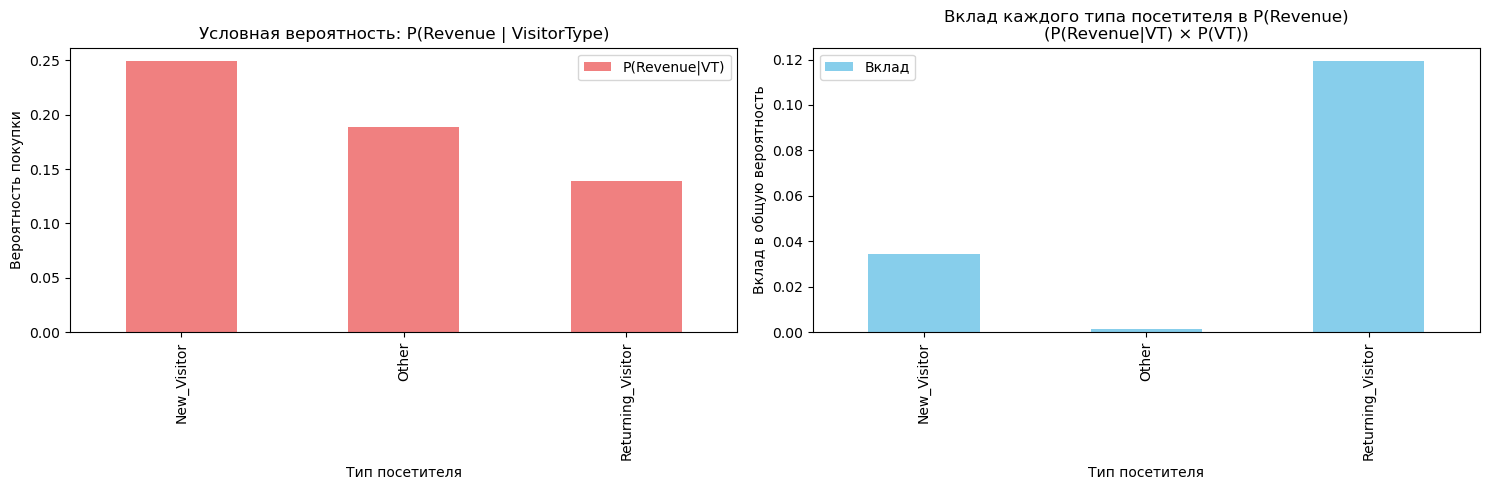

In [56]:
# Визуализируем вклад типов посетителей
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Левая часть: P(Revenue | VisitorType)
prob_df.plot(x='VisitorType', y='P(Revenue|VT)', kind='bar', ax=ax1, color='lightcoral')
ax1.set_title('Условная вероятность: P(Revenue | VisitorType)')
ax1.set_ylabel('Вероятность покупки')
ax1.set_xlabel('Тип посетителя')

# Правая часть: Вклад в общую вероятность
prob_df.plot(x='VisitorType', y='Вклад', kind='bar', ax=ax2, color='skyblue')
ax2.set_title('Вклад каждого типа посетителя в P(Revenue)\n(P(Revenue|VT) × P(VT))')
ax2.set_ylabel('Вклад в общую вероятность')
ax2.set_xlabel('Тип посетителя')

plt.tight_layout()
plt.show()

### Вывод.

Формула полной вероятности позволяет вычислить вероятность сложного события (Покупка), разбив его на сценарии (Тип посетителя), по которым нам проще считать.

## Формула Байеса (формула проверки гипотез)

### Задача. Есть купивший посетитель. Информации о его типе нет, но требуется понять, из какого он, скорее всего, типа. Другими словами,необходимо найти $P_{Revenue}(VisitorType)$.

**Теорема Байеса позволяет это найти:**

$$
P_B(A) = \frac{P(A) \cdot P_A(B)}{P(B)}
$$

В данном случае:
- A: `VisitorType = i`
- B: `Revenue = True`

Тогда:

$$
P_{Revenue}(VisitorType = i) = \frac{P(VisitorType = i) \cdot P_{VisitorType=i}(Revenue)}{P(Revenue)}
$$

In [58]:
print("ТЕОРЕМА БАЙЕСА:")
print("P(VisitorType | Revenue=True) = [P(Revenue|VisitorType) × P(VisitorType)] / P(Revenue)")
print("=" * 50)

# P(Revenue) - знаменатель
P_S = data['Revenue'].mean()

bayes_results = []

for vt in sorted(data['VisitorType'].unique()):
    # P(VisitorType = i) - априорная вероятность
    P_A = (data['VisitorType'] == vt).mean()
    
    # P(Revenue | VisitorType = i) - правдоподобие
    P_B_given_A = conditional_probability(data, 'VisitorType', vt, 'Revenue')
    
    # Применяем теорему Байеса
    P_A_given_B = (P_B_given_A * P_A) / P_S if P_S > 0 else 0.0
    
    bayes_results.append({
        'VisitorType': vt,
        'P(VT)': P_A,
        'P(Revenue|VT)': P_B_given_A,
        'P(VT|Revenue)': P_A_given_B
    })

# Создаем DataFrame для наглядности
bayes_df = pd.DataFrame(bayes_results)
print("Результаты применения теоремы Байеса:")
print(bayes_df.round(3))

ТЕОРЕМА БАЙЕСА:
P(VisitorType | Revenue=True) = [P(Revenue|VisitorType) × P(VisitorType)] / P(Revenue)
Результаты применения теоремы Байеса:
         VisitorType  P(VT)  P(Revenue|VT)  P(VT|Revenue)
0        New_Visitor  0.137          0.249          0.221
1              Other  0.007          0.188          0.008
2  Returning_Visitor  0.856          0.139          0.770


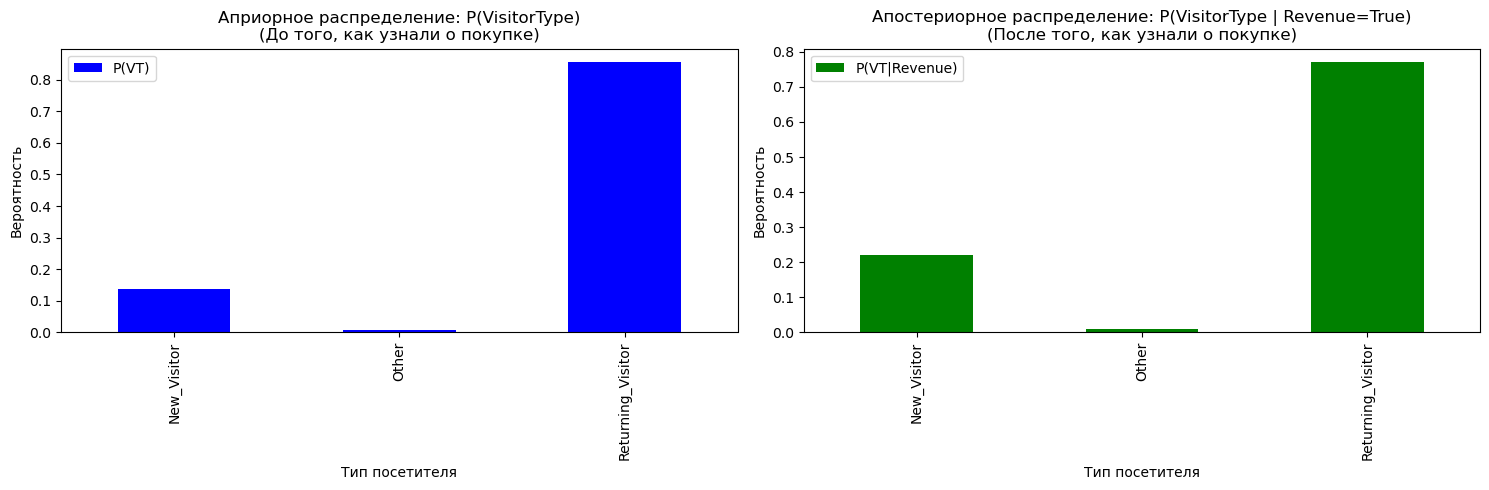

In [59]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Априорное распределение
bayes_df.plot(x='VisitorType', y='P(VT)', kind='bar', ax=ax1, color='blue')
ax1.set_title('Априорное распределение: P(VisitorType)\n(До того, как узнали о покупке)')
ax1.set_ylabel('Вероятность')
ax1.set_xlabel('Тип посетителя')

# Апостериорное распределение
bayes_df.plot(x='VisitorType', y='P(VT|Revenue)', kind='bar', ax=ax2, color='green')
ax2.set_title('Апостериорное распределение: P(VisitorType | Revenue=True)\n(После того, как узнали о покупке)')
ax2.set_ylabel('Вероятность')
ax2.set_xlabel('Тип посетителя')

plt.tight_layout()
plt.show()

### Вывод.

Теорема Байеса позволяет обновлять наши убеждения (о типе посетителя) на основе новых свидетельств (факт покупки).
Хотя постоянные покупатели составляют большинство, (85.6%), их условная вероятность покупки ниже, чем у новых покупаетелей.T) = 0.249`). T) = 0.249`). 